In [1]:
#import dependencies
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import numpy as np

In [2]:
#get data from previous notebook for consistency
travis_housing_tenure = "Travis_County_Data/Housing_Tenure.csv"
williamson_tenure = "williamson_data/williamson_tenure.csv"
hays_housing_tenure = "hays_data/hays_housing_tenure.csv"

hays_housing_tenure_data_df = pd.read_csv(hays_housing_tenure,thousands = ",")
travis_housing_tenure_data_df = pd.read_csv(travis_housing_tenure)
williamson_tenure_data_df = pd.read_csv(williamson_tenure,sep='\t',thousands = ",")

hays_housing_tenure_data_clean_df = hays_housing_tenure_data_df.dropna(how = "any")
williamson_tenure_data_clean_df = williamson_tenure_data_df.dropna(how = "any")


In [3]:
#hays_owners
owned_hays = hays_housing_tenure_data_df.drop([0,2])
owned_hays

,HOUSING TENURE,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,Owner-occupied,27106,29272,31367,32946,37412,36861,37764,39751,38945,41317,43597


In [4]:
#hays renters
rented_hays = hays_housing_tenure_data_df.drop([0,1])
rented_hays

,HOUSING TENURE,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
2,Renter-occupied,15444,15531,15641,15763,17010,19893,19631,20988,24552,26029,27670


In [5]:
#travis county owned
owned_travis = travis_housing_tenure_data_df.drop([0,2])
owned_travis

,HOUSING TENURE,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,Owner-occupied,198701,199550,206170,207109,206912,205261,213091,221657,223202,227913,236286


In [6]:
#travis county rented
rented_travis = travis_housing_tenure_data_df.drop([0,1])
rented_travis

,HOUSING TENURE,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
2,Renter-occupied,168083,169028,175137,184480,196726,205422,201227,207232,214173,218429,221524


In [7]:
#williamson county owned
owned_williamson = williamson_tenure_data_clean_df.drop([0,2])
owned_williamson

,HOUSING TENURE,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
1,Owner-occupied,88133.0,91626.0,94284.0,100598.0,104671.0,104293.0,112744.0,110714.0,119375.0,117637.0


In [8]:
#williamson county rented
rented_williamson = williamson_tenure_data_clean_df.drop([0,1])
rented_williamson

,HOUSING TENURE,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
2,Renter-occupied,33766.0,36165.0,38697.0,52141.0,52067.0,51922.0,49143.0,54091.0,51612.0,55488.0


In [9]:
#total owned dataframe
total_owned = pd.concat([owned_travis,owned_williamson,owned_hays], ignore_index = True)
total_owned = total_owned.drop(["2006","HOUSING TENURE"], axis = 1) 
total_owned

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,199550.0,206170.0,207109.0,206912.0,205261.0,213091.0,221657.0,223202.0,227913.0,236286.0
1,88133.0,91626.0,94284.0,100598.0,104671.0,104293.0,112744.0,110714.0,119375.0,117637.0
2,29272.0,31367.0,32946.0,37412.0,36861.0,37764.0,39751.0,38945.0,41317.0,43597.0


In [10]:
#get sums of owned for plotting
owned_sums = total_owned.sum(axis = 0)
owned_sums

2007    316955.0
2008    329163.0
2009    334339.0
2010    344922.0
2011    346793.0
2012    355148.0
2013    374152.0
2014    372861.0
2015    388605.0
2016    397520.0
dtype: float64

In [11]:
#total rented dataframe
total_rented = pd.concat([rented_travis,rented_williamson,rented_hays], ignore_index = True)
total_rented = total_rented.drop(["2006","HOUSING TENURE"], axis = 1) 
total_rented

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,169028.0,175137.0,184480.0,196726.0,205422.0,201227.0,207232.0,214173.0,218429.0,221524.0
1,33766.0,36165.0,38697.0,52141.0,52067.0,51922.0,49143.0,54091.0,51612.0,55488.0
2,15531.0,15641.0,15763.0,17010.0,19893.0,19631.0,20988.0,24552.0,26029.0,27670.0


In [12]:
#get sums of rented for plotting
rented_sums = total_rented.sum(axis = 0)
rented_sums

2007    218325.0
2008    226943.0
2009    238940.0
2010    265877.0
2011    277382.0
2012    272780.0
2013    277363.0
2014    292816.0
2015    296070.0
2016    304682.0
dtype: float64

In [13]:
total_owned_data = owned_sums.values
total_rented_data = rented_sums.values
x_axis = np.arange(len(total_owned_data))

In [14]:
plt.bar(x_axis, total_rented_data, color = "r")
plt.bar(x_axis, total_owned_data, bottom = total_rented_data, color = "b")

<Container object of 10 artists>

In [15]:
plt.xticks(x_axis, ["2007","2008","2009","2010","2011","2012","2013","2014","2015","2016"])
plt.ylim(0,775000,100000)
plt.xlabel("Year")
plt.ylabel("Number of Housing Units")
plt.title("Rent Vs Owned in Austin")

Text(0.5,1,'Rent Vs Owned in Austin')

In [16]:
#for legend
red_patch = mpatches.Patch(color = "r", label = "Rented")
blue_patch = mpatches.Patch(color = "b", label = "Owned")
plt.legend(handles = [blue_patch,red_patch], loc = "best")

In [17]:
plt.savefig("Saved_Pngs/rented_vs_owned.png")

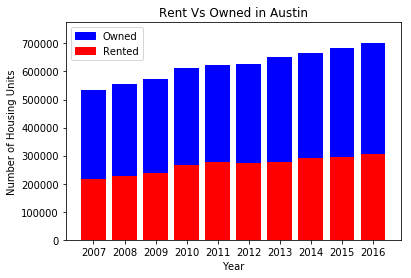

In [18]:
plt.show()